In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [58]:
df=pd.read_csv("adult.data")

In [59]:
df.shape

(32560, 15)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [61]:
df.describe()

,39,77516,13,2174,0,40
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [62]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [63]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [64]:
df.dtypes

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object

In [65]:
df.isnull().sum().sort_values(ascending=False)

39                0
 State-gov        0
 77516            0
 Bachelors        0
 13               0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 White            0
 Male             0
 2174             0
 0                0
 40               0
 United-States    0
 <=50K            0
dtype: int64

In [66]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

[' State-gov',
 ' Bachelors',
 ' Never-married',
 ' Adm-clerical',
 ' Not-in-family',
 ' White',
 ' Male',
 ' United-States',
 ' <=50K']

In [67]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['39', ' 77516', ' 13', ' 2174', ' 0', ' 40']

In [68]:
#Encoding
!pip install category_encoders

In [69]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols=categorical_cols)
df=encoder.fit_transform(df)

In [70]:
df.dtypes

39                int64
 State-gov        int64
 77516            int64
 Bachelors        int64
 13               int64
 Never-married    int64
 Adm-clerical     int64
 Not-in-family    int64
 White            int64
 Male             int64
 2174             int64
 0                int64
 40               int64
 United-States    int64
 <=50K            int64
dtype: object

In [71]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [72]:
# split the dataset into features and target column
# Clean column names and split dataset
df.columns = df.columns.str.strip() 
x = df.drop('<=50K', axis=1)       
y = df['<=50K']                    

In [73]:
df["<=50K"].value_counts()

<=50K
1    24719
2     7841
Name: count, dtype: int64

In [74]:
# scaling the input feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled = pd.DataFrame(X_scaled, columns=x.columns)
X_scaled.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
0,0.837097,-1.083249,-1.008742,-0.991615,1.134779,-0.899242,-1.421932,-0.906950,-0.353415,-0.703087,-0.145914,-0.216663,-2.22212,-0.255751
1,-0.042640,-0.412348,0.245046,-0.702056,-0.420027,-0.282809,-1.121584,-0.255542,-0.353415,-0.703087,-0.145914,-0.216663,-0.03543,-0.255751
2,1.057031,-0.412348,0.425770,-0.412497,-1.197429,-0.899242,-1.121584,-0.906950,1.240599,-0.703087,-0.145914,-0.216663,-0.03543,-0.255751
3,-0.775755,-0.412348,1.408146,-0.991615,1.134779,-0.899242,-0.821235,0.395866,1.240599,1.422298,-0.145914,-0.216663,-0.03543,-0.057549
4,-0.115952,-0.412348,0.898170,-0.122938,1.523480,-0.899242,-1.421932,0.395866,-0.353415,1.422298,-0.145914,-0.216663,-0.03543,-0.255751


In [75]:
# divide into train dataset and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [76]:
x_train.shape,y_train.shape

((26048, 14), (26048,))

In [77]:
x_test.shape,y_test.shape

((6512, 14), (6512,))

In [78]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(x_train, y_train)
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=10,metric='euclidean')
knn_model.fit(x_train, y_train)
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [79]:
nb_pred = nb_model.predict(x_test) 
knn_pred = knn_model.predict(x_test)  
lr_pred = lr_model.predict(x_test)
nb_pred
knn_pred
lr_pred

array([1, 2, 2, ..., 1, 1, 1])

In [80]:
from sklearn.metrics import accuracy_score
nb_accuracy = accuracy_score(y_test, nb_model.predict(x_test)) * 100
knn_accuracy = accuracy_score(y_test, knn_model.predict(x_test)) * 100
lr_accuracy = accuracy_score(y_test, lr_model.predict(x_test)) * 100

print(f"NB Accuracy: {nb_accuracy:.2f}%")
print(f"KNN Accuracy: {knn_accuracy:.2f}%")
print(f"LR Accuracy: {lr_accuracy:.2f}%")

NB Accuracy: 79.68%
KNN Accuracy: 79.13%
LR Accuracy: 81.11%


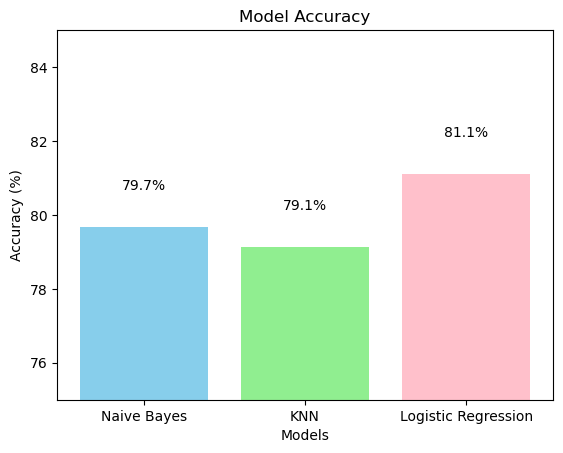

In [81]:
#bar chart for showing accuracies 
models = ['Naive Bayes', 'KNN', 'Logistic Regression']
accuracies = [nb_accuracy, knn_accuracy, lr_accuracy]
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'pink'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy')
plt.ylim(75,85)
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')
plt.show()